In [1]:
from cars import Car, Simulator, Road
import numpy as np
from matplotlib import pyplot as plt
import random as random
import seaborn
%matplotlib inline

In [2]:
cars = [Car() for _ in range(30)]

In [3]:
road = Road(length=1)

In [4]:
sim = Simulator(cars, road, 1)

In [5]:
hist, shist = sim.loop(60) # sim automatically drops first 60 seconds
graph_hist = hist.flatten()

In [6]:
times = [i for _ in range(30) for i in range(60)]

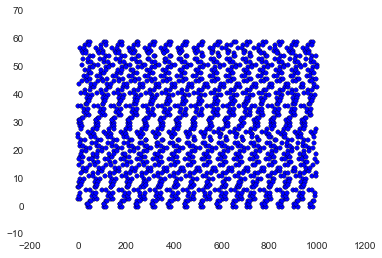

In [7]:
plt.scatter(graph_hist, times)

In [8]:
standard_deviation = np.std(shist)*3.6
mean = np.mean(shist)*3.6

print("The optimal speed limit is {}km/h.".format(int(mean+standard_deviation)))


The optimal speed limit is 123km/h.


In [9]:
mods = [1, 1.4, 1, 2, 1, 1.2, 1]
km = 7
time = 3600
road = Road(km, mods)
cars = [Car() for _ in range(km*30)]

In [10]:
sim = Simulator(cars, road, 1)

In [11]:
hist, shist = sim.loop(time)
graph_hist = hist.flatten()
times = [i for _ in range(km*30) for i in range(time)]

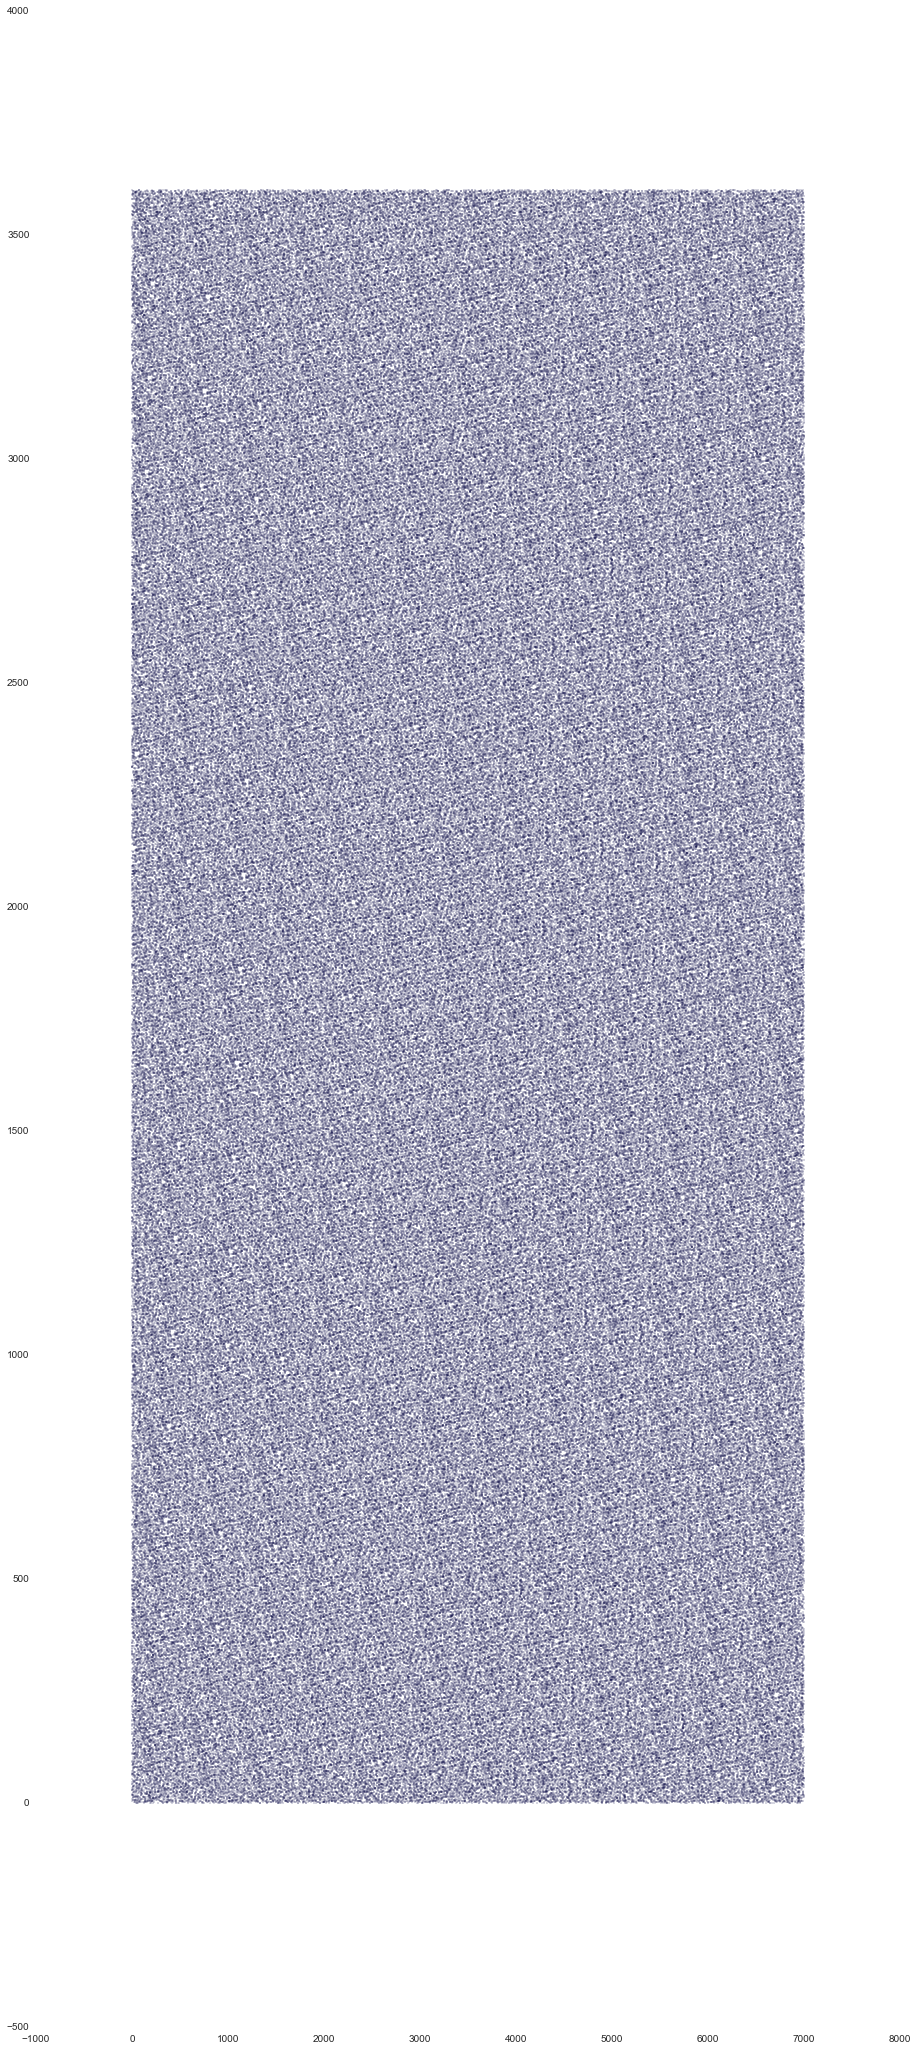

In [12]:
plt.subplots_adjust(left=1, right =3, top=8, bottom=1)
plt.scatter(graph_hist, times, s=1, marker=".")

In [13]:
standard_deviation = np.std(shist)*3.6
mean = np.mean(shist)*3.6

print("The optimal speed limit is {}km/h.".format(int(mean+standard_deviation)))


The optimal speed limit is 124km/h.


In [14]:
def random_car():
    num = random.random()
    if num < .1:
        return Car(target_speed=39, inc=5, chance=.05) # aggressive
    if .1 < num < .25:
        return Car(target_speed=28, min_mult=2, inc=1.5, length=25) # commercial
    else:
        return Car() # normal

In [4]:
mods = [.1, .4, .1, 1, .1, .2, .1]
km = 7
time = 7200 # 2 hours traffic == 11 seconds computing
road = Road(km, mods)
cars = [random_car() for _ in range(km*30)]

In [5]:
sim = Simulator(cars, road, 1)

In [45]:
hist, shist = sim.loop(time)
graph_hist = hist.flatten()
times = [i for _ in range(km*30) for i in range(time)]

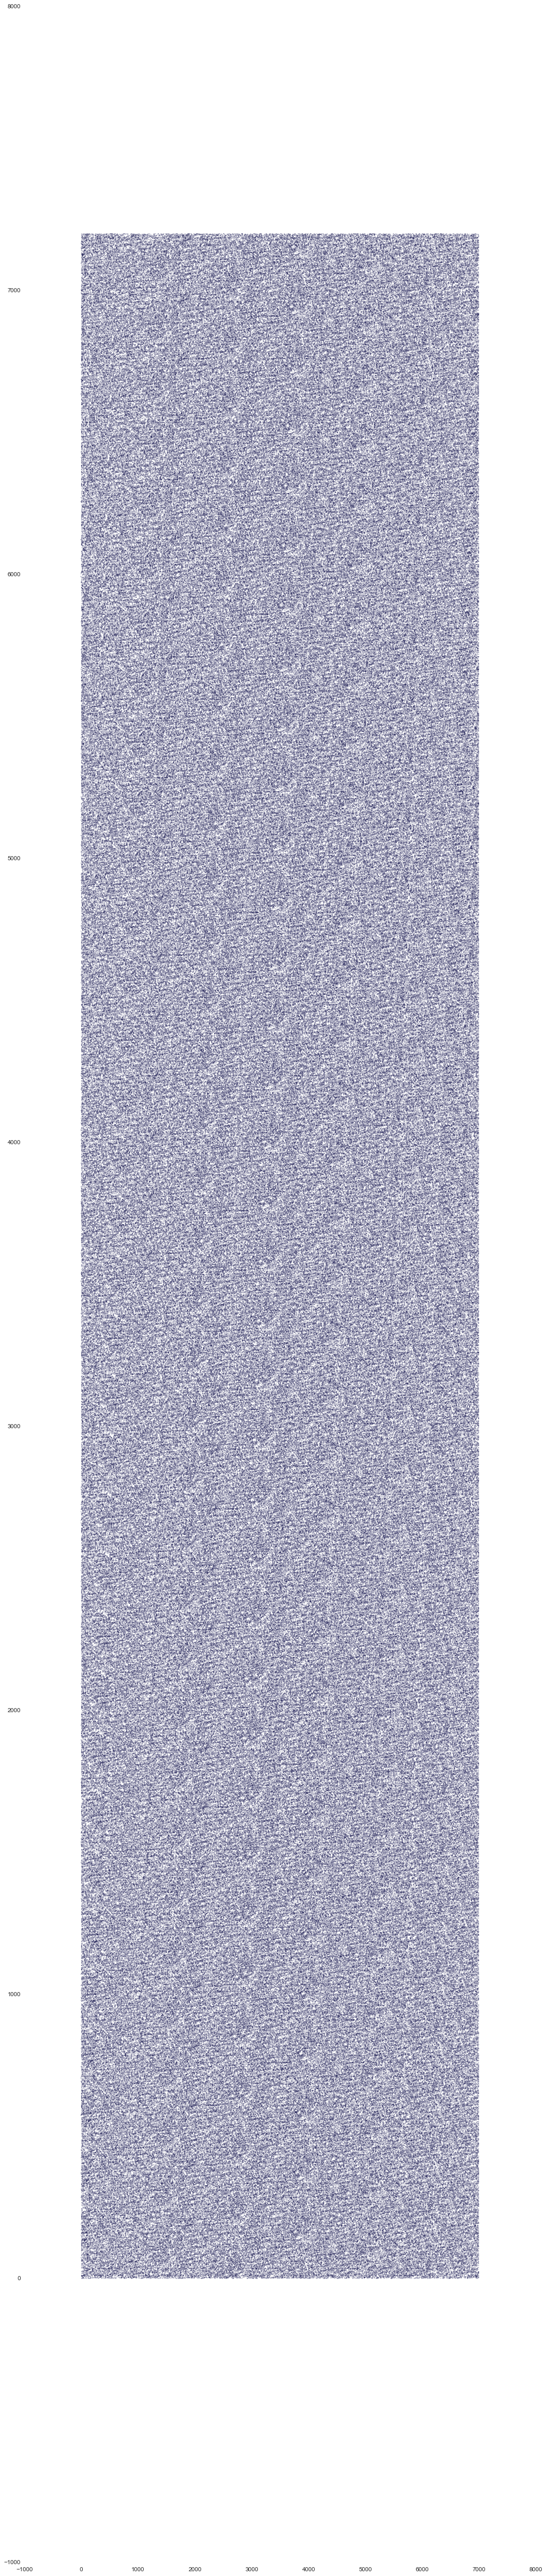

In [46]:
plt.subplots_adjust(left=1, right =3, top=16, bottom=1)
plt.scatter(graph_hist, times, s=1, marker=".")

In [47]:
standard_deviation = np.std(shist)*3.6
mean = np.mean(shist)*3.6

print("The optimal speed limit is {}km/h.".format(int(mean+standard_deviation)))


The optimal speed limit is 141km/h.


In [48]:
print("Aggressive Cars: {}".format(len([car for car in sim.cars if car.target_speed == 39])))
print("Normal Cars: {}".format(len([car for car in sim.cars if car.target_speed == 34])))
print("Commercial Vehicles: {}".format(len([car for car in sim.cars if car.target_speed == 28])))

Aggressive Cars: 27
Normal Cars: 159
Commercial Vehicles: 24


In [8]:
speed = []
time = 60
sim.loop(2)
for _ in range(1000):
    sim.reset()
    hist, shist = sim.loop(time)
    speed.append(np.mean(shist) + np.std(shist))
    
print("Suggested speed limit: {}".format(np.mean(np.array(speed))))

Suggested speed limit: 39.85652865827444


In [10]:
print("Which is {}km/h".format(int(np.mean(np.array(speed))*3.6, )))

Which is 143km/h


In [15]:
cars = [random_car() for _ in range(30)]
road = Road(length=1)
sim = Simulator(cars, road, 1)
hist, shist = sim.loop(60)

In [16]:
times = [i for _ in range(30) for i in range(60)]
graph_hist = hist.flatten()

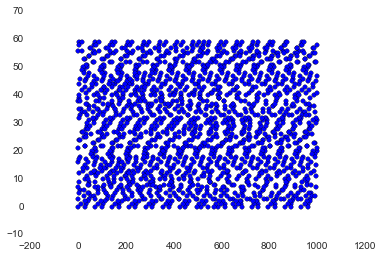

In [17]:
plt.scatter(hist, times)

In [18]:
print("Suggested Speed: {}km/h".format(int(np.mean(shist)*3.6)))

Suggested Speed: 130km/h


In [19]:
mods = [1, 1.4, 1, 2, 1, 1.2, 1]
km = 7
time = 120
road = Road(km, mods)
cars = [Car() for _ in range(km*30)]

In [20]:
sim = Simulator(cars, road, 1)

In [21]:
hist, shist = sim.loop(time)
graph_hist = hist.flatten()
times = [i for _ in range(km*30) for i in range(time)]

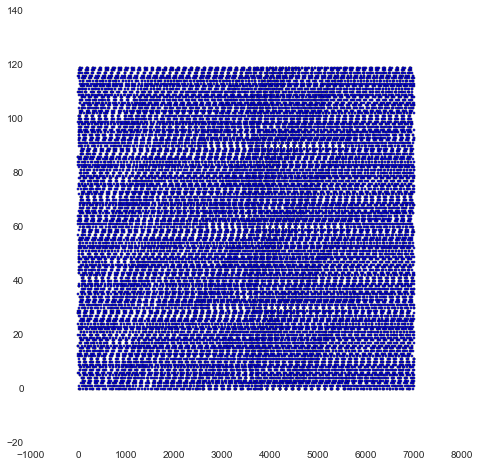

In [22]:
plt.subplots_adjust(left=1, right =2, top=2.5, bottom=1)
plt.scatter(hist, times, marker = ".")

In [23]:
mods = [1, 1.4, 1, 2, 1, 1.2, 1]
km = 7
time = 60
road = Road(km, mods)
cars = [Car() for _ in range(km*30)]

In [24]:
sim = Simulator(cars, road, 1)

In [25]:
hist, shist = sim.loop(time)
graph_hist = hist.flatten()
times = [i for _ in range(km*30) for i in range(time)]

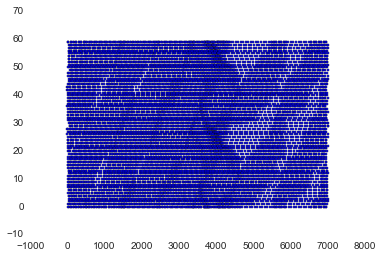

In [26]:
plt.scatter(hist, times, marker = ".")

In [29]:
ave = []
for _ in range(1000):
    hist, shist = sim.loop(time)
    ave.append(np.array(shist.flatten()))
    sim.reset()
    
ave = np.array(ave)
print("Suggested speed limit: {}km/h".format(int(np.mean(ave) + np.std(ave))))

Suggested speed limit: 34km/h
